# Solutions - Practical Lesson 6

## Exercises

### Exercise 6.1
Write a ForwardRateCurve (for EURIBOR/LIBOR rate curve) which doesn't compute discount factors but only interpolates forward rates; then add it to the finmarkets module.

#### Solution
In this case it is enough to write a new `class` that has three attributes: a today date, a set of pillar_dates and the corresponding rates. There will be just a single method `forward_rate` which returns the corresponding interpolated rate.

In [1]:
import numpy

# an EURIBOR or LIBOR rate curve
# doesn't calculate discount factors, only interpolates forward rates
class ForwardRateCurve(object):
    
    # the special __init__ method defines how to
    # construct instances of the class
    def __init__(self, pillar_dates, rates):
        
        # we just store the arguments as attributes of the instance
        self.today = pillar_dates[0]
        self.rates = rates
        
        self.pillar_days = [
            (pillar_date - self.today).days
            for pillar_date in pillar_dates
        ]
        
        
    # interpolates the forward rates stored in the instance
    def forward_rate(self, d):
        d_days = (d - self.today).days
        return numpy.interp(d_days, self.pillar_days, self.rates)

### Exercise 6.2
Using the function `randint` of the module `random` make a Monte Carlo simulation of rolling three dices to check the probability of getting the same values on the three of them.

From the probability theory you should expect:

$$P_{d1=d2=d3} = \frac{1}{6}\cdot\frac{1}{6}\cdot\frac{1}{6}\cdot 6 = \frac{1}{36} = 0.0278$$

In [1]:
from random import seed, randint

seed(1)

trials = 10000000
success = 0
for _ in range(trials):
  d1, d2, d3 = randint(1, 6), randint(1, 6), randint(1, 6)
  
  if d1 == d2 and d2 == d3:
    success += 1
    
print ("The probability to get three equal dice is {:.4f}".format(success/trials))

The probability to get three equal dice is 0.0278


### Exercise 6.3
Using the function `normal` of `numpy.random` simulate the price of a stock which evolves according to a log-normal stochastic process with a daily rate of return $\mu=0.1$ and a volatility $\sigma=0.15$ for 30 days.

Also plot the price. Try to play with $\mu$ and $\sigma$ to see how the plot changes.

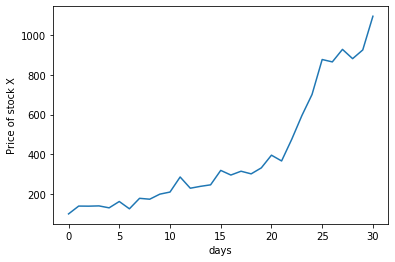

In [3]:
from numpy.random import normal, seed
from matplotlib import pyplot as plt
import math

S = 100
mu = 0.1
sigma = 0.15
T = 1

seed(1)
historical_series = [S]
for i in range(30):
    S = S * math.exp((mu - 0.5 * sigma * sigma) * T + sigma * math.sqrt(T) * normal())
    historical_series.append(S)
    
plt.plot(range(31), historical_series)
plt.xlabel("days")
plt.ylabel("Price of stock X")
plt.show()
    

### Exercise 6.4
Suppouse that the Libor Forward rates are those defined $\href{}{here}$. Determine the value of an option to pay a fixed rate of 4% and receives LIBOR on a 5 year swap starting in 1 year. Assume the  notional is 100 EUR, the exercise date is on October, 30th 2020 and the swap rate volatility is 15%.

In [4]:
from finmarkets import InterestRateSwap
from datetime import date
from dateutil.relativedelta import relativedelta
from curve_data import discount_curve, libor_curve
from scipy.stats import norm
import math

pricing_date = date.today()
start_date = date.today() + relativedelta(years=1)
exercise_date = date(2020, 10, 30)

irs = InterestRateSwap(start_date, 100, 0.04, 12, 5)
sigma = 0.15

A = irs.annuity(discount_curve)
S = irs.swap_rate(discount_curve, libor_curve)
T = (exercise_date - pricing_date).days / 365
d1 = (math.log(S/irs.fixed_rate) + 0.5 * sigma**2 * T) / (sigma * T**0.5)
d2 = (math.log(S/irs.fixed_rate) - 0.5 * sigma**2 * T) / (sigma * T**0.5)
npv = irs.notional * A * (S * norm.cdf(d1) - irs.fixed_rate * norm.cdf(d2))

print("Swaption NPV: {:.3f} EUR".format(npv))

Swaption NPV: 13.587 EUR
